In [6]:
#Import
import psycopg2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox


# Paramètres de connexion à la base de données
dbname = "LeagueBet"
user = "Ivan"
password = "r6sOtXPV5ugzD4q9958"
host = "bdd.ilovebeemo.com"
port = 35475
options = "-c client_encoding=UTF8"

C:\Users\yifor\AppData\Local\Temp\ipykernel_6096\482400201.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


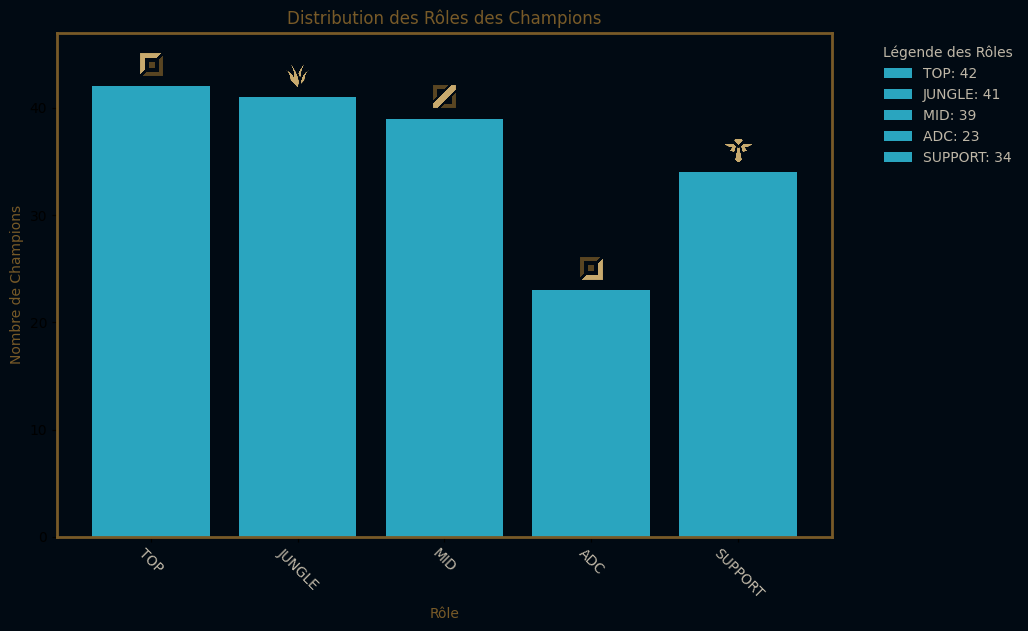

In [9]:
# Définir une fonction pour ajouter des images
def add_image(ax, img_path, x, y, zoom=0.1):
    img = plt.imread(img_path)
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, (x, y), frameon=False, pad=0)
    ax.add_artist(ab)

conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)

# Requête pour sélectionner les rôles et les noms des champions
query = "SELECT name, role FROM champions"

# Exécution de la requête et récupération des données
df = pd.read_sql(query, conn)

# Fermeture de la connexion
conn.close()

# Regroupement des données par rôle
role_counts = df['role'].value_counts()


# Dictionnaire de traduction des rôles
translations = {
    "TOP": "TOP",
    "JUNGLE": "JUNGLE",
    "MIDDLE": "MID",
    "BOTTOM": "ADC",
    "UTILITY": "SUPPORT",
}

# Appliquer la traduction
role_counts.index = role_counts.index.map(translations)

# Définir l'ordre souhaité
desired_order = ["TOP", "JUNGLE", "MID", "ADC", "SUPPORT"]

images = {
    "TOP": "img/top.png",
    "JUNGLE": "img/jgl.png",
    "MID": "img/mid.png",
    "ADC": "img/adc.png",
    "SUPPORT": "img/supp.png",
}

# Réorganiser role_counts selon l'ordre souhaité
ordered_role_counts = role_counts.reindex(desired_order)

# Création du graphique avec une seule couleur pour toutes les barres
# Création du graphique avec une seule couleur pour toutes les barres
fig, ax = plt.subplots(figsize=(10, 6))

# Définir la couleur pour toutes les barres
bar_color = "#2AA5BF"  # Remplacez par la couleur de votre choix

# Utilisez une liste pour stocker les labels
labels = []

for role in desired_order:
    role_count = ordered_role_counts[role]
    # Ajouter le label uniquement pour la première occurrence de chaque rôle
    if role not in labels:
        ax.bar(role, role_count, color=bar_color, label=f"{role}: {role_count}")
        labels.append(role)
    else:
        ax.bar(role, role_count, color=bar_color)

# Maintenant, ajoutez la légende
legend = plt.legend(title="Légende des Rôles", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)


# Définir une couleur de fond pour le graphique et la zone de traçage
fig.patch.set_facecolor('#010A13')  # Couleur de fond du graphique
ax.set_facecolor('#010A13')         # Couleur de fond de la zone de traçage

# Ajouter des images au-dessus de chaque barre
image_height = 2  # Hauteur de l'image (peut être ajustée)


for i, role in enumerate(desired_order):
    role_count = ordered_role_counts[role]
    y = role_count + image_height  # Ajouter un espace au-dessus
    add_image(ax, images[role], i, y, zoom=0.15)

# Trouver la valeur maximale dans ordered_role_counts
max_value = ordered_role_counts.max()

# Augmenter légèrement la limite supérieure
upper_limit = max_value + 5  # Vous pouvez ajuster la valeur ajoutée selon vos besoins

# Appliquer la nouvelle limite à l'axe des y
ax.set_ylim(0, upper_limit)

# Personnalisation des bordures du graphique
for spine in ax.spines.values():
    spine.set_edgecolor('#785A28')  # Choisir la couleur de la bordure
    spine.set_linewidth(2)       # Choisir l'épaisseur de la bordure

legend = plt.legend(title="Légende des Rôles", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.title('Distribution des Rôles des Champions', color='#785A28')
plt.xlabel('Rôle', color='#785A28')
plt.ylabel('Nombre de Champions', color='#785A28')
plt.xticks(rotation=-45, color='#BFB7A7')
plt.setp(legend.get_title(), color='#BFB7A7')
plt.setp(legend.get_texts(), color='#BFB7A7')


# Ajuster la marge supérieure sans affecter la position des éléments
plt.subplots_adjust(top=0.95)  # Vous pouvez ajuster la valeur top selon vos besoins

plt.show()


C:\Users\yifor\AppData\Local\Temp\ipykernel_6096\4067850994.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


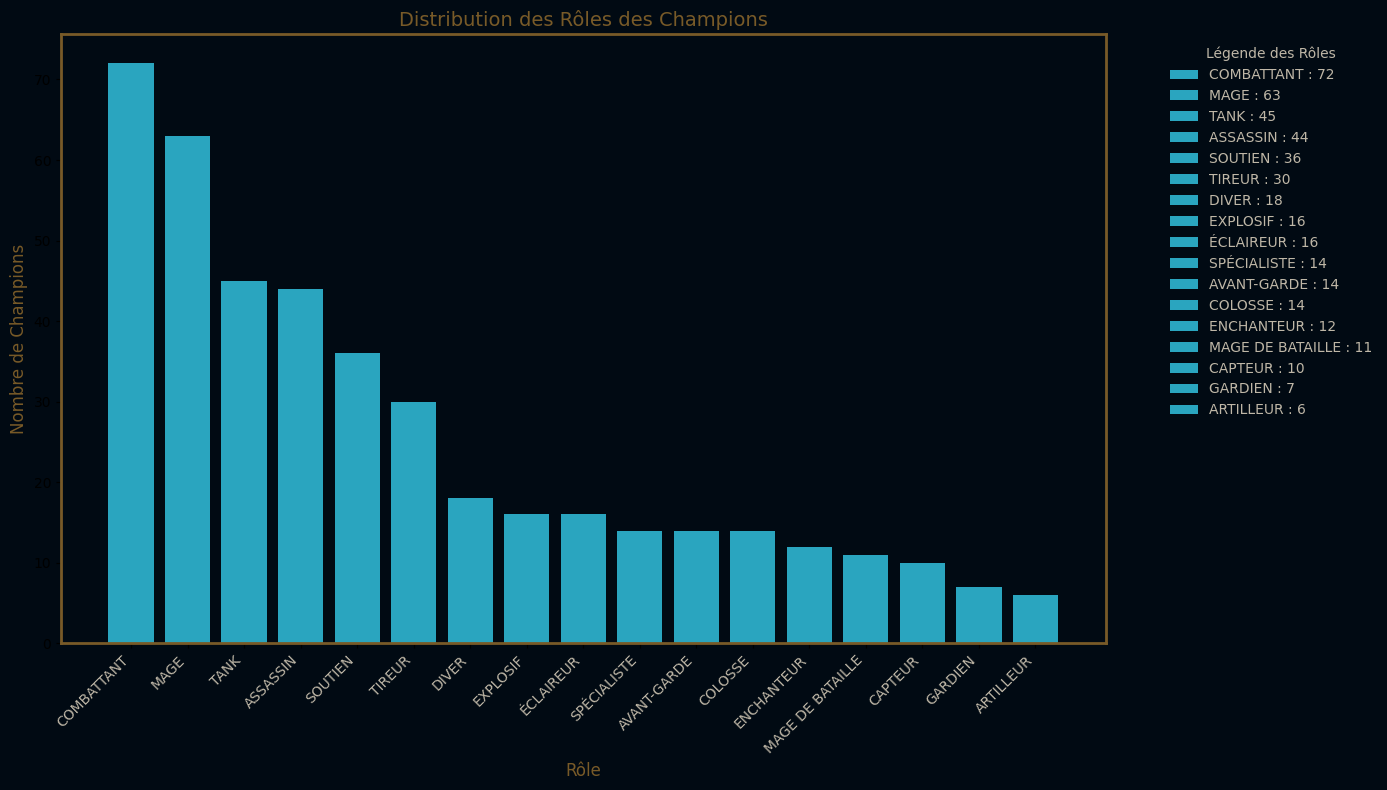

In [26]:
# Connexion à la base de données
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)

# Requête pour sélectionner les rôles et les noms des champions
query = "SELECT name, roles FROM champions"

# Exécution de la requête et récupération des données
df = pd.read_sql(query, conn)

# Fermeture de la connexion
conn.close()

# Supprimer les doublons de noms de champions
df = df.drop_duplicates(subset='name')

# S'assurer que 'roles' est une liste (si ce n'est pas déjà le cas)
df['roles'] = df['roles'].apply(lambda x: x if isinstance(x, list) else [x])

# Séparation des rôles en lignes distinctes
roles_exploded = df['roles'].explode()

# Compter les occurrences de chaque rôle
role_counts = roles_exploded.value_counts()

# Dictionnaire de traduction des rôles
translations = {
    "FIGHTER": "COMBATTANT",
    "JUGGERNAUT": "COLOSSE",
    "TANK": "TANK",
    "ASSASSIN": "ASSASSIN",
    "BURST": "EXPLOSIF",
    "MAGE": "MAGE",
    "MARKSMAN": "TIREUR",
    "BATTLEMAGE": "MAGE DE BATAILLE",
    "ARTILLERY": "ARTILLEUR",
    "SPECIALIST": "SPÉCIALISTE",
    "SUPPORT": "SOUTIEN",
    "CATCHER": "CAPTEUR",
    "DIVER": "DIVER",
    "SKIRMISHER": "ÉCLAIREUR",
    "VANGUARD": "AVANT-GARDE",
    "ENCHANTER": "ENCHANTEUR",
    "WARDEN": "GARDIEN"
}

# Appliquer la traduction
role_counts.index = role_counts.index.map(translations)

# Création du graphique avec le même style
fig, ax = plt.subplots(figsize=(14, 8))  # Taille ajustée

# Appliquer le style personnalisé
bar_color = "#2AA5BF"

# Créer les barres avec des étiquettes pour la légende
for role, count in role_counts.items():
    ax.bar(role, count, color=bar_color, label=f"{role} : {count}")

fig.patch.set_facecolor('#010A13')
ax.set_facecolor('#010A13')

# Personnalisation des bordures du graphique
for spine in ax.spines.values():
    spine.set_edgecolor('#785A28')
    spine.set_linewidth(2)

# Titre et étiquettes
plt.title('Distribution des Rôles des Champions', fontsize=14, color='#785A28')
plt.xlabel('Rôle', fontsize=12, color='#785A28')
plt.ylabel('Nombre de Champions', fontsize=12, color='#785A28')

# Configuration des étiquettes de l'axe x
plt.xticks(rotation=45, ha='right', fontsize=10, color='#BFB7A7')

# Ajouter la légende
legend = ax.legend(title="Légende des Rôles", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)
plt.setp(legend.get_title(), color='#BFB7A7')
plt.setp(legend.get_texts(), color='#BFB7A7')

# Ajuster les marges
plt.tight_layout()

# Afficher le graphique
plt.show()


In [3]:
def get_win_rates(data, champion, min_matches=50):
    """
    Calcule le taux de victoire des adversaires contre un champion donné.
    """
    # Sélectionner les matchs impliquant le champion
    matches = data[(data['champ1'] == champion) | (data['champ2'] == champion)]

    # Identifier l'adversaire et déterminer si le champion a gagné
    opponent = matches.apply(lambda row: row['champ2'] if row['champ1'] == champion else row['champ1'], axis=1)
    wins = matches.apply(lambda row: 1 if (row['champ1'] == champion and row['win'] == 0) or (row['champ2'] == champion and row['win'] == 1) else 0, axis=1)

    # Combiner les informations dans un DataFrame
    results = pd.DataFrame({'opponent': opponent, 'wins': wins, 'total': 1})

    # Grouper par adversaire et calculer le taux de victoire
    win_rates = results.groupby('opponent').sum()
    win_rates = win_rates[win_rates['total'] >= min_matches]
    win_rates['win_rate'] = win_rates['wins'] / win_rates['total']

    return win_rates[['win_rate']]

def top_counter_champions(data, champion, top_n=60):
    """
    Retourne les champions ayant les meilleurs taux de victoire contre le champion choisi.
    """
    win_rates = get_win_rates(data, champion)
    return win_rates.nlargest(top_n, 'win_rate')

def load_data(filepath):
    """
    Charge les données du fichier CSV.
    """
    return pd.read_csv(filepath)

# Utilisation de la fonction
file_path = 'data/1v1.csv'  # Assurez-vous que ce chemin est correct
data = load_data(file_path)

# Demander à l'utilisateur de saisir un champion
champion = input("Entrez le nom d'un champion : ")
top_counters = top_counter_champions(data, champion)
print(f"Les 10 meilleurs champions contre {champion} sont :")
for champ, row in top_counters.iterrows():
    print(f"{champ} avec un taux de victoire de {row['win_rate'] * 100:.2f}%")


Les 10 meilleurs champions contre Zed sont :
Kayn avec un taux de victoire de 66.13%
Kled avec un taux de victoire de 61.40%
Nocturne avec un taux de victoire de 60.55%
XinZhao avec un taux de victoire de 60.27%
Ezreal avec un taux de victoire de 59.74%
Karthus avec un taux de victoire de 59.38%
Camille avec un taux de victoire de 58.09%
Heimerdinger avec un taux de victoire de 57.02%
Malphite avec un taux de victoire de 56.23%
Pantheon avec un taux de victoire de 55.56%
Khazix avec un taux de victoire de 55.36%
Jayce avec un taux de victoire de 55.28%
Fiora avec un taux de victoire de 54.72%
LeeSin avec un taux de victoire de 54.33%
Talon avec un taux de victoire de 54.26%
Leblanc avec un taux de victoire de 53.80%
Diana avec un taux de victoire de 53.76%
Velkoz avec un taux de victoire de 53.64%
Lux avec un taux de victoire de 53.46%
Sett avec un taux de victoire de 53.09%
Annie avec un taux de victoire de 52.58%
Akshan avec un taux de victoire de 52.50%
Qiyana avec un taux de victoi

C:\Users\yifor\AppData\Local\Temp\ipykernel_28072\3392568081.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  champion_roles = pd.read_sql(query, conn)


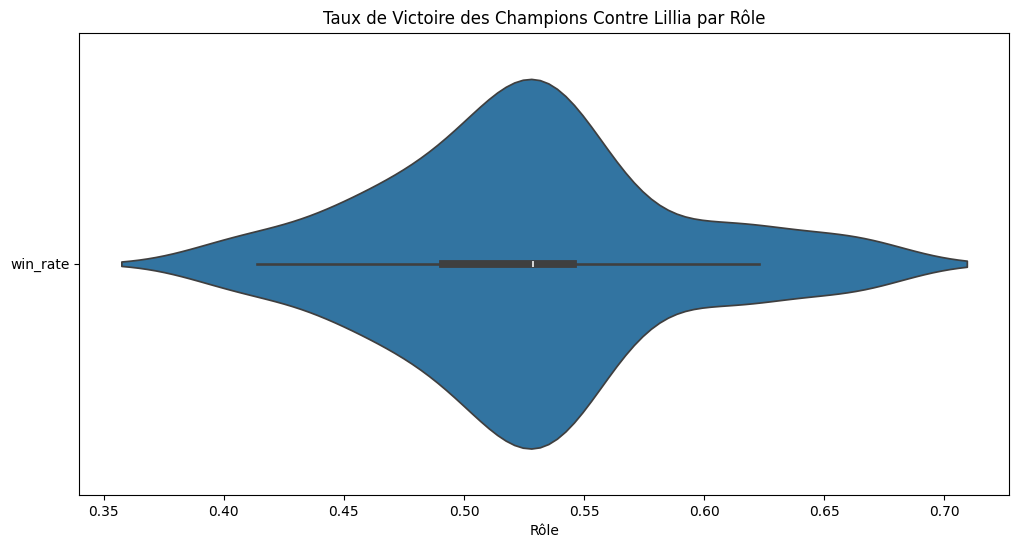

In [12]:
conn = psycopg2.connect(dbname=dbname, user=user, password=password, host=host, port=port)
query = "SELECT name, roles FROM champions"
champion_roles = pd.read_sql(query, conn)
conn.close()

# Traiter les données des rôles
champion_roles['roles'] = champion_roles['roles'].apply(lambda x: x if isinstance(x, list) else [x])

# Utiliser vos fonctions pour obtenir les taux de victoire
data = pd.read_csv('data/1v1.csv')  # Charger les données de match
champion = input("Entrez le nom d'un champion : ")
top_counters = top_counter_champions(data, champion)

# Exploser la colonne 'roles' pour que chaque rôle soit sur une ligne distincte
champion_roles_exploded = champion_roles.explode('roles')


# Fusionner les taux de victoire avec les rôles des champions
merged_data = pd.merge(top_counters, champion_roles_exploded, left_index=True, right_on='name')

# Visualiser les résultats
plt.figure(figsize=(12, 6))
sns.violinplot(data=merged_data, orient='h')
plt.title(f'Taux de Victoire des Champions Contre {champion} par Rôle')
plt.xlabel('Rôle')
plt.show()